<a href="https://colab.research.google.com/github/ishankagg/Deep-Learning-Modules/blob/main/Module_9_Deep_Learning_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Datasets/cats_vs_dogs_small.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Datasets/cats_vs_dogs_small.zip
replace cats_vs_dogs_small/test/Cat/1500.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Building the model
### Instantiating a small convnet for dogs vs. cats classification

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint


new_base_dir = r"/content/cats_vs_dogs_small"

train_dataset = image_dataset_from_directory(f"{new_base_dir}/train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(f"{new_base_dir}/validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(f"{new_base_dir}/test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch.x",
#         save_best_only=True,
#         monitor="val_loss")
# ]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)
    # callbacks=callbacks

Displaying curves of loss and accuracy during training

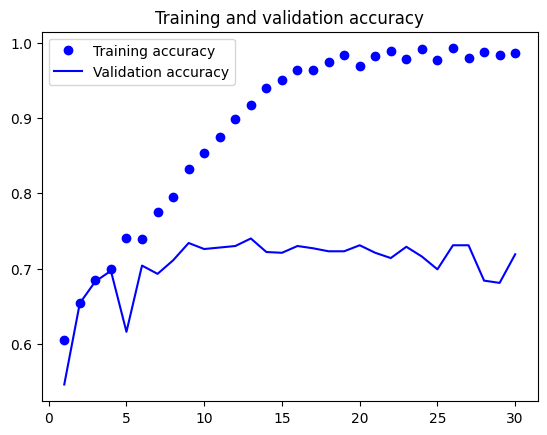

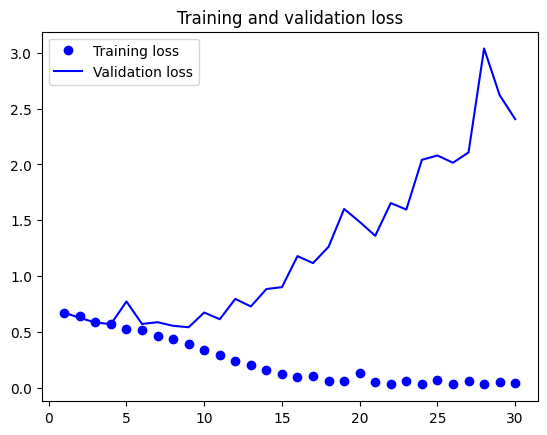

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
# Load the saved model
test_model = load_model("convnet_from_scratch.keras")

OSError: ignored

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

42/63 [===================>..........] - ETA: 1s - loss: 2.3884 - accuracy: 0.7180

InvalidArgumentError: ignored

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

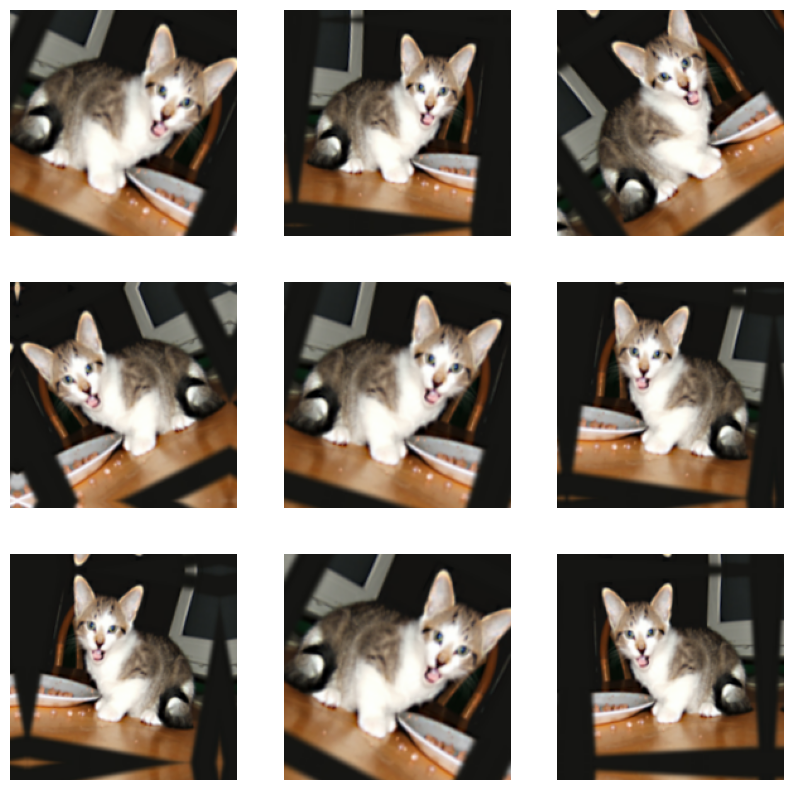

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset)

Epoch 1/100
63/63 [==============================] - 11s 78ms/step - loss: 0.7046 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6954 - accuracy: 0.5110 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 6s 98ms/step - loss: 0.6967 - accuracy: 0.5145 - val_loss: 0.6920 - val_accuracy: 0.5140
Epoch 4/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6920 - accuracy: 0.5350 - val_loss: 0.6902 - val_accuracy: 0.5220
Epoch 5/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6951 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5530
Epoch 6/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6879 - accuracy: 0.5830 - val_loss: 0.6965 - val_accuracy: 0.5250
Epoch 7/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6769 - accuracy: 0.5815 - val_loss: 0.6678 - val_accuracy: 0.5800
Epoch

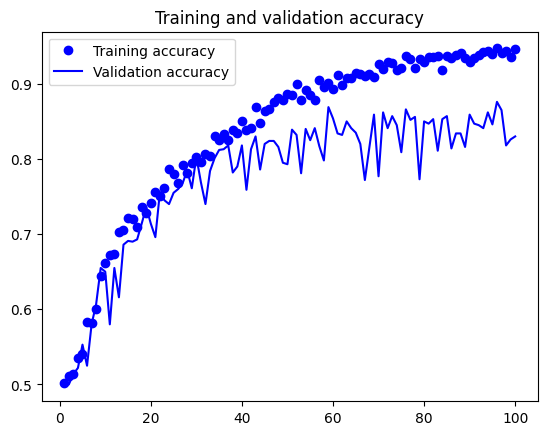

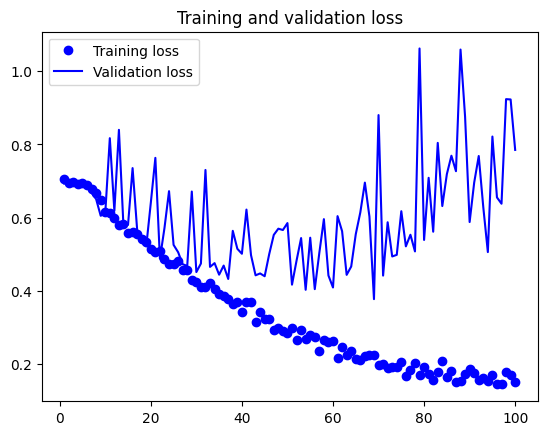

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 25ms/step


InvalidArgumentError: ignored

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16

# Assuming you have a pre-trained VGG16 model (conv_base)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        # Preprocess the images
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)

        # Extract features using the pre-trained VGG16 model
        features = conv_base.predict(preprocessed_images)

        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)

# Assuming you have 'train_dataset', 'validation_dataset', and 'test_dataset'

# Extract features and labels
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)


1/1 [==============================] - 0s 24ms/step


InvalidArgumentError: ignored

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 35ms/step - loss: 17.3621 - accuracy: 0.9240 - val_loss: 3.8703 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 3.1841 - accuracy: 0.9735 - val_loss: 7.8386 - val_accuracy: 0.9570
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 2.1119 - accuracy: 0.9820 - val_loss: 3.5374 - val_accuracy: 0.9800
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 0.7538 - accuracy: 0.9940 - val_loss: 4.7985 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.3962 - accuracy: 0.9890 - val_loss: 4.4116 - val_accuracy: 0.9770
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9103 - accuracy: 0.9945 - val_loss: 5.1433 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7849 - accuracy: 0.9920 - val_loss: 5.0358 - val_accuracy: 0.9750
Epoch 8/20
63

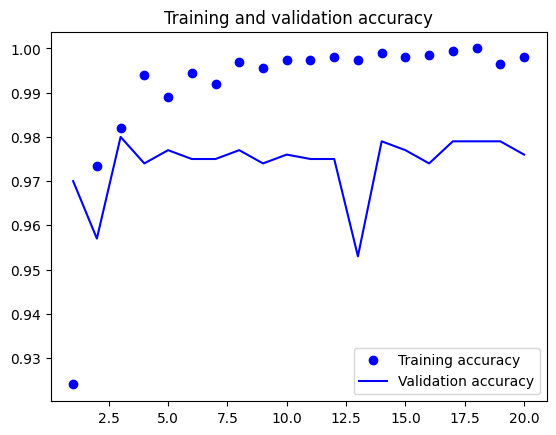

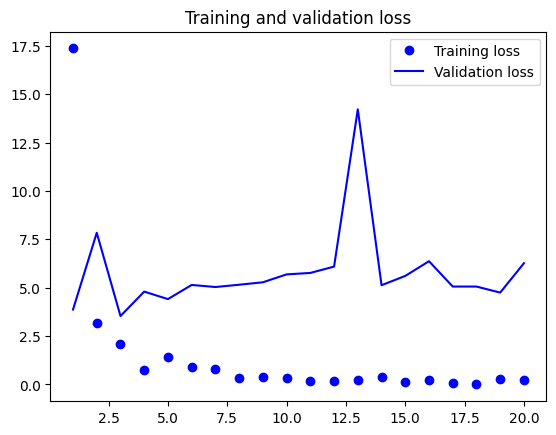

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 12s 139ms/step - loss: 18.7640 - accuracy: 0.8925 - val_loss: 6.9797 - val_accuracy: 0.9580
Epoch 2/50
63/63 [==============================] - 9s 139ms/step - loss: 7.7893 - accuracy: 0.9450 - val_loss: 4.5987 - val_accuracy: 0.9750
Epoch 3/50
63/63 [==============================] - 11s 172ms/step - loss: 5.1592 - accuracy: 0.9555 - val_loss: 6.0304 - val_accuracy: 0.9670
Epoch 4/50
63/63 [==============================] - 9s 143ms/step - loss: 4.1319 - accuracy: 0.9655 - val_loss: 4.3787 - val_accuracy: 0.9750
Epoch 5/50
63/63 [==============================] - 11s 173ms/step - loss: 4.4781 - accuracy: 0.9655 - val_loss: 8.7703 - val_accuracy: 0.9600
Epoch 6/50
63/63 [==============================] - 10s 149ms/step - loss: 3.0995 - accuracy: 0.9665 - val_loss: 9.0167 - val_accuracy: 0.9540
Epoch 7/50
63/63 [==============================] - 9s 140ms/step - loss: 3.1792 - accuracy: 0.9755 - val_loss: 3.5823 - val_accuracy: 0.9790
E

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/30
63/63 [==============================] - 16s 200ms/step - loss: 0.3477 - accuracy: 0.9930 - val_loss: 2.9226 - val_accuracy: 0.9680
Epoch 2/30
63/63 [==============================] - 10s 155ms/step - loss: 0.6526 - accuracy: 0.9920 - val_loss: 1.7322 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 11s 161ms/step - loss: 0.3865 - accuracy: 0.9900 - val_loss: 1.9359 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 11s 164ms/step - loss: 0.2918 - accuracy: 0.9920 - val_loss: 1.7900 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 11s 171ms/step - loss: 0.3689 - accuracy: 0.9935 - val_loss: 1.7890 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 11s 168ms/step - loss: 0.2219 - accuracy: 0.9925 - val_loss: 1.9542 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 11s 165ms/step - loss: 0.3108 - accuracy: 0.9920 - val_loss: 1.8755 - val_accuracy: 0.9820